In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, Conv2D, MaxPooling2D

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train = x_train.reshape(60000, 28,28,1)
x_test = x_test.reshape(10000, 28,28,1)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

In [7]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test, n_classes)

In [8]:
n_hidden_1 = 256 
n_classes  = 10 

training_epochs = 15
batch_size = 100

In [9]:
model = keras.Sequential()
model.add(Conv2D(
            filters=16,
            kernel_size = (3,3),
            padding = 'same',
            input_shape = (28,28,1), 
            activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(n_hidden_1, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [11]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 11s 185us/step - loss: 0.2120 - acc: 0.9380 - val_loss: 0.0780 - val_acc: 0.9748
Epoch 2/15
60000/60000 [==============================] - 11s 187us/step - loss: 0.0681 - acc: 0.9800 - val_loss: 0.0569 - val_acc: 0.9803
Epoch 3/15
60000/60000 [==============================] - 12s 202us/step - loss: 0.0456 - acc: 0.9863 - val_loss: 0.0443 - val_acc: 0.9837
Epoch 4/15
60000/60000 [==============================] - 13s 213us/step - loss: 0.0320 - acc: 0.9903 - val_loss: 0.0443 - val_acc: 0.9854
Epoch 5/15
60000/60000 [==============================] - 13s 210us/step - loss: 0.0223 - acc: 0.9934 - val_loss: 0.0478 - val_acc: 0.9836
Epoch 6/15
60000/60000 [==============================] - 12s 207us/step - loss: 0.0163 - acc: 0.9950 - val_loss: 0.0428 - val_acc: 0.9864
Epoch 7/15
60000/60000 [==============================] - 12s 207us/step - loss: 0.0132 - acc: 0.9959 - val_loss: 0.

## 使用CNN 辨識人臉

### 抓取明星圖片

In [15]:
import requests
res = requests.get('https://www.google.com.tw/search?ei=WchSW_n6H4Gg-Qb815eQBA&yv=3&q={}&tbm=isch&vet=10ahUKEwi5i-DMvq_cAhUBUN4KHfzrBUIQuT0IuAEoAQ.WchSW_n6H4Gg-Qb815eQBA.i&ved=0ahUKEwi5i-DMvq_cAhUBUN4KHfzrBUIQuT0IuAEoAQ&ijn=3&start=300&asearch=ichunk&async=_id:rg_s,_pms:s,_fmt:pc'.format('周子瑜'))

from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text)

import json
images = []
for rec in soup.select('.rg_meta'):
    jd = json.loads(rec.text)
    #print(jd.get('tu'))
    images.append(jd.get('tu'))

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [18]:

with open('1.jpg', 'wb') as f:
    res2 = requests.get('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRgXfKue9JkZ8BBcv_GDk8zx8f8f6lKsBeU1TtW4s5g2oC_ny_uBA')
    f.write(res2.content)

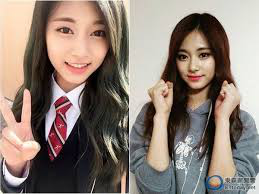

In [19]:
from PIL import Image
Image.open('1.jpg')

In [20]:
import json, requests
from bs4 import BeautifulSoup
google_url = 'https://www.google.com.tw/search?ei=WchSW_n6H4Gg-Qb815eQBA&yv=3&q={}&tbm=isch&vet=10ahUKEwi5i-DMvq_cAhUBUN4KHfzrBUIQuT0IuAEoAQ.WchSW_n6H4Gg-Qb815eQBA.i&ved=0ahUKEwi5i-DMvq_cAhUBUN4KHfzrBUIQuT0IuAEoAQ&ijn=3&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_fmt:pc'


def getIdolImage(keywords, dest_dir, batch):
    for i in range(batch):
        res = requests.get(google_url.format(keywords, i* 100))
        soup = BeautifulSoup(res.text, 'lxml')  

        for rec in soup.select('.rg_meta'):
            jd = json.loads(rec.text)
            url = jd.get('tu')
            with open(dest_dir + url.split('tbn:')[1] + '.jpg', 'wb') as f:
                res2 = requests.get(url)
                f.write(res2.content)

In [21]:
import os
os.mkdir('idol1')
os.mkdir('idol2')
os.mkdir('idol3')

In [22]:
getIdolImage('蕭亞軒', 'idol1/', 3)

In [23]:
getIdolImage('溫嵐', 'idol2/', 3)

In [24]:
getIdolImage('徐若瑄', 'idol3/', 3)

### 安裝 OpenCV

In [25]:
! pip install opencv-python

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [26]:
import cv2 as cv

In [31]:
os.listdir('idol1/')[1]

'ANd9GcR9DwuEsroT7cASFhgrAcllxh2bhc7o9UPK7jiCWEpD6trxvyU3.jpg'

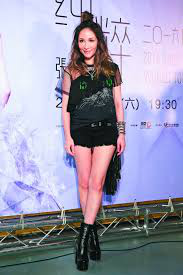

In [33]:
from PIL import Image
Image.open('idol1/ANd9GcR9DwuEsroT7cASFhgrAcllxh2bhc7o9UPK7jiCWEpD6trxvyU3.jpg')

In [41]:
img = cv.imread('idol1/ANd9GcR9DwuEsroT7cASFhgrAcllxh2bhc7o9UPK7jiCWEpD6trxvyU3.jpg')

In [43]:
img.shape

(275, 183, 3)

In [44]:
face_cascade = cv.CascadeClassifier('/opt/local/share/OpenCV/haarcascades/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(img, 1.3, 5)

In [45]:
faces

array([[74, 31, 26, 26]], dtype=int32)

In [46]:
x,y,w,h = faces[0]

In [47]:
im = Image.open('idol1/ANd9GcR9DwuEsroT7cASFhgrAcllxh2bhc7o9UPK7jiCWEpD6trxvyU3.jpg')

In [48]:
im.crop((x,y,x + w, y+h))

In [49]:
def cropFace(src_path, dest_path):
    face_cascade = cv.CascadeClassifier('/opt/local/share/OpenCV/haarcascades/haarcascade_frontalface_default.xml')

    for f in os.listdir(src_path):
        img   = cv.imread(src_path + f)
        faces = face_cascade.detectMultiScale(img, 1.3, 5)
        if len(faces) == 1:
            x , y, w, h = faces[0]
            im = Image.open(src_path + f)
            im = im.crop((x,y,x + w, y+h)).resize((64,64))
            im.save(dest_path+f)

In [50]:
os.mkdir('idol1_face/')
cropFace('idol1/', 'idol1_face/')

In [51]:
os.mkdir('idol2_face/')
cropFace('idol2/', 'idol2_face/')

In [52]:
os.mkdir('idol3_face/')
cropFace('idol3/', 'idol3_face/')

### 建立 CNN 模型

In [59]:
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()
# Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Flattening
classifier.add(Flatten())

# Fully Connected
classifier.add(Dense(units = 128, activation = 'relu')) 
classifier.add(Dense(units = 3, activation = 'softmax'))

classifier.compile(optimizer = 'adam', 
                        loss ='categorical_crossentropy', 
                     metrics = ['accuracy'])

In [60]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,     #x坐标保持不变，而对应的y坐标按比例发生平移
                                   zoom_range = 0.2,      #可以让图片在长或宽的方向进行放大
                                   horizontal_flip = True #水平翻转操作
                                  )

In [61]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [62]:
training_set = train_datagen.flow_from_directory(
    'trainset/', target_size = (64, 64),
     batch_size = 30,
     class_mode = 'categorical')

Found 402 images belonging to 3 classes.


In [63]:
test_set = test_datagen.flow_from_directory(
    'testset/', target_size = (64, 64),
    batch_size = 30, 
    class_mode = 'categorical')

Found 90 images belonging to 3 classes.


In [64]:
history = classifier.fit_generator(training_set,
                         epochs = 100,
                         verbose = 1, 
                         validation_data = test_set)

Epoch 1/100
14/14 [==============================] - 2s 128ms/step - loss: 1.3032 - acc: 0.3367 - val_loss: 1.1023 - val_acc: 0.3333
Epoch 2/100
14/14 [==============================] - 1s 95ms/step - loss: 1.0909 - acc: 0.3993 - val_loss: 1.1014 - val_acc: 0.3333
Epoch 3/100
14/14 [==============================] - 1s 96ms/step - loss: 1.0831 - acc: 0.4059 - val_loss: 1.1096 - val_acc: 0.3333
Epoch 4/100
14/14 [==============================] - 1s 97ms/step - loss: 1.0875 - acc: 0.4136 - val_loss: 1.0900 - val_acc: 0.4222
Epoch 5/100
14/14 [==============================] - 1s 97ms/step - loss: 1.0814 - acc: 0.4140 - val_loss: 1.0837 - val_acc: 0.3444
Epoch 6/100
14/14 [==============================] - 1s 98ms/step - loss: 1.0639 - acc: 0.4231 - val_loss: 1.0593 - val_acc: 0.5222
Epoch 7/100
14/14 [==============================] - 1s 99ms/step - loss: 1.0253 - acc: 0.5005 - val_loss: 1.0976 - val_acc: 0.4889
Epoch 8/100
14/14 [==============================] - 1s 105ms/step - loss: 

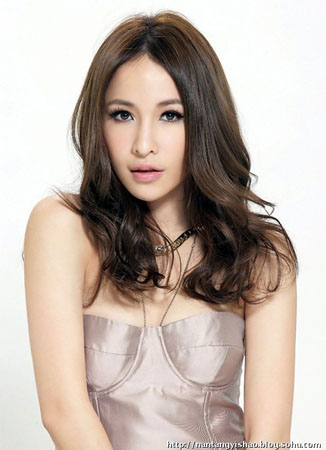

In [74]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
face_cascade = cv.CascadeClassifier('/opt/local/share/OpenCV/haarcascades/haarcascade_frontalface_default.xml')
from PIL import Image

img = cv.imread('elva.jpg')
faces = face_cascade.detectMultiScale(img, 1.3, 5)
im = Image.open('elva.jpg')
im

In [75]:
faces

array([[ 90,  75, 116, 116]], dtype=int32)

In [76]:
x,y,w,h = faces[0]
box = (x, y, x+w, y+h)
crpim = im.crop(box).resize((64,64))
crpim.save('elva_d.jpg')

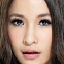

In [77]:
crpim

In [78]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('elva_d.jpg', target_size= (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
type(test_image)
test_image.shape
classifier.predict_classes(test_image)

array([0])

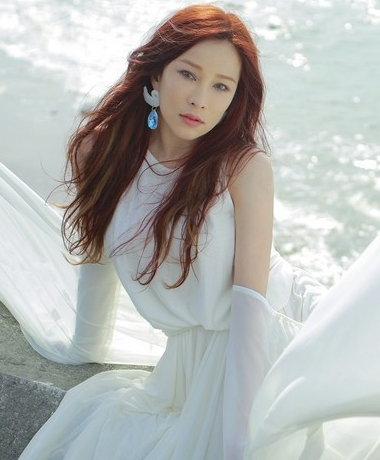

In [79]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
face_cascade = cv.CascadeClassifier('/opt/local/share/OpenCV/haarcascades/haarcascade_frontalface_default.xml')
from PIL import Image

img = cv.imread('landy.jpg')
faces = face_cascade.detectMultiScale(img, 1.3, 5)
im = Image.open('landy.jpg')
im

In [80]:
faces

array([[156,  46,  93,  93]], dtype=int32)

In [81]:
x,y,w,h = faces[0]
box = (x, y, x+w, y+h)
crpim = im.crop(box).resize((64,64))
crpim.save('landy_d.jpg')

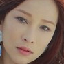

In [82]:
crpim

In [83]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('landy_d.jpg', target_size= (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
type(test_image)
test_image.shape
classifier.predict_classes(test_image)

array([2])

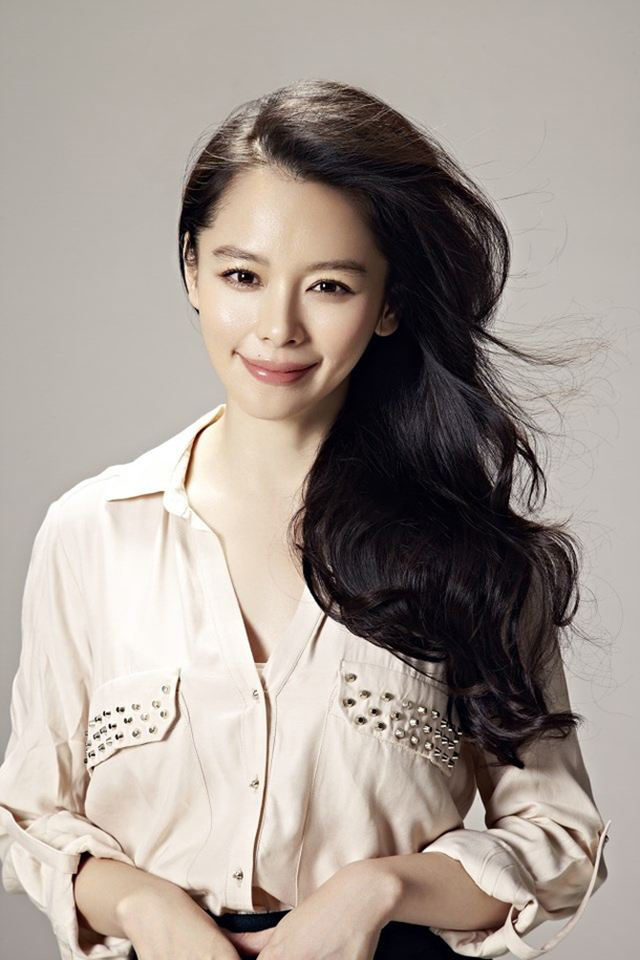

In [84]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
face_cascade = cv.CascadeClassifier('/opt/local/share/OpenCV/haarcascades/haarcascade_frontalface_default.xml')
from PIL import Image

img = cv.imread('vivian.jpg')
faces = face_cascade.detectMultiScale(img, 1.3, 5)
im = Image.open('vivian.jpg')
im

In [85]:
x,y,w,h = faces[0]
box = (x, y, x+w, y+h)
crpim = im.crop(box).resize((64,64))
crpim.save('vivian_d.jpg')

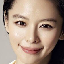

In [86]:
crpim

In [87]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('vivian_d.jpg', target_size= (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
type(test_image)
test_image.shape
classifier.predict_classes(test_image)

array([2])

## 股價預測

In [1]:
import pandas
dataset = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/ctbcpy/master/data/2891.TW.csv')

In [2]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-08-19,15.4873,15.5286,15.3634,15.3634,12.581450,50951134.0
1,2013-08-20,15.3634,15.7764,15.3634,15.5699,12.750557,72321917.0
2,2013-08-22,15.4047,15.4460,15.2808,15.4047,12.615272,52556485.0
3,2013-08-23,15.4873,15.4873,15.2808,15.3221,12.547627,32079177.0
4,2013-08-26,15.3634,15.4047,15.2395,15.3221,12.547627,21872001.0


In [3]:
dataset.isnull().sum()

Date         0
Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
dtype: int64

In [4]:
dataset.dropna(inplace=True)

In [5]:
dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
dataset['Date'] = pandas.to_datetime(dataset['Date'])

Populating the interactive namespace from numpy and matplotlib


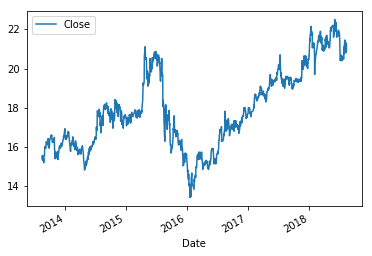

In [8]:
%pylab inline
dataset[['Date','Close']].plot(kind = 'line', x = 'Date', y= 'Close')

In [9]:
dataset.count()

Date         1224
Open         1224
High         1224
Low          1224
Close        1224
Adj Close    1224
Volume       1224
dtype: int64

In [10]:
training_set  = dataset.iloc[0:1224 - 200, 4:5].values

In [11]:
len(training_set)

1024

In [12]:
test_set = dataset.iloc[1224 - 200:, 4:5].values

In [13]:
len(test_set)

200

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [15]:
training_set_scaled

array([[0.25201941],
       [0.2788798 ],
       [0.25739149],
       ...,
       [0.77707827],
       [0.77707827],
       [0.77707827]])

In [16]:
len(training_set_scaled)

1024

In [17]:
import numpy as np
X_train = []
y_train = []
for i in range(60, len(training_set_scaled) ):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [18]:
X_train.shape

(964, 60)

In [19]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [20]:
X_train.shape

(964, 60, 1)

In [21]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Using TensorFlow backend.


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [22]:

regressor.fit(X_train, y_train, epochs = 100, batch_size = 100)

Epoch 1/100
964/964 [==============================] - 4s 5ms/step - loss: 0.1345
Epoch 2/100
964/964 [==============================] - 2s 2ms/step - loss: 0.0261
Epoch 3/100
964/964 [==============================] - 2s 2ms/step - loss: 0.0174
Epoch 4/100
964/964 [==============================] - 2s 2ms/step - loss: 0.0144
Epoch 5/100
964/964 [==============================] - 2s 2ms/step - loss: 0.0109
Epoch 6/100
964/964 [==============================] - 2s 2ms/step - loss: 0.0103
Epoch 7/100
964/964 [==============================] - 2s 2ms/step - loss: 0.0089
Epoch 8/100
964/964 [==============================] - 2s 2ms/step - loss: 0.0089
Epoch 9/100
964/964 [==============================] - 2s 2ms/step - loss: 0.0091
Epoch 10/100
964/964 [==============================] - 2s 2ms/step - loss: 0.0087
Epoch 11/100
964/964 [==============================] - 2s 2ms/step - loss: 0.0084
Epoch 12/100
964/964 [==============================] - 2s 2ms/step - loss: 0.0083
Epoch 13/100


964/964 [==============================] - 2s 2ms/step - loss: 0.0034
Epoch 100/100
964/964 [==============================] - 2s 2ms/step - loss: 0.0036


In [23]:
test_set.shape


(200, 1)

In [24]:
test_set = sc.transform(test_set)

In [25]:
#test_set

In [26]:
X_test = []
for i in range(60, len(test_set)):
    X_test.append(test_set[i-60:i, 0])

In [27]:
X_test = np.array(X_test)

In [28]:
X_test.shape

(140, 60)

In [29]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [30]:
X_test.shape

(140, 60, 1)

In [31]:

predicted_stock_price  = regressor.predict(X_test)

In [32]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [33]:
predicted_stock_price[0:3]

array([[21.338806],
       [21.357368],
       [21.33309 ]], dtype=float32)

In [34]:
test_set.shape

(200, 1)

In [35]:
predicted_stock_price.shape

(140, 1)

In [36]:
real_stock_price = sc.inverse_transform(test_set[60:])

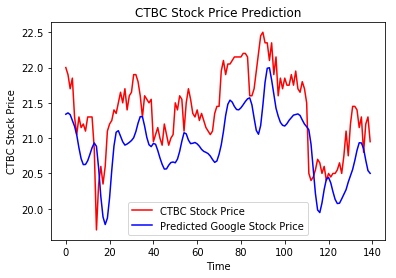

In [37]:
import matplotlib.pyplot as plt
plt.plot(real_stock_price     , color = 'red' , label = 'CTBC Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('CTBC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('CTBC Stock Price')
plt.legend()
plt.show()

## 自動寫文

In [39]:
import keras
from keras import layers
import sys
import numpy as np

text= 'this text file can be any text, as long as it contains text longer than maxlen defined below'

chars=['\n', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~']

# Dictionary mapping unique characters to their index in `chars`
char_indices = dict((char, chars.index(char)) for char in chars)
maxlen=60
step=1

model = keras.models.Sequential()
model.add(layers.LSTM(1024, input_shape=(maxlen, len(chars)),return_sequences=True))
model.add(layers.LSTM(1024, input_shape=(maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))
model.load_weights("data/pre-trained.hdf5")

optimizer = keras.optimizers.Adam(lr=0.0002)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

In [40]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

def random_reviews():
    # sample a start index
    start_index = np.random.randint(0, len(text) - maxlen - 1)
    # the initial sampled text with maxlen long
    generated_text = text[start_index: start_index + maxlen]
    print('Coming up with several reviews for you...')

    for temperature in [0.8]:
        sys.stdout.write(generated_text)

        # We generate 600 characters
        for i in range(600):
            sampled = np.zeros((1, maxlen, len(chars)))
            # Turn each char to char index.
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.
            # Predict next char probabilities
            preds = model.predict(sampled, verbose=0)[0]
            # Add some randomness by sampling given probabilities.
            next_index = sample(preds, temperature)
            # Turn char index to char.
            next_char = chars[next_index]
            # Append char to generated text string
            generated_text += next_char
            # Pop the first char in generated text string.
            generated_text = generated_text[1:]
            # Print the new generated char.
            sys.stdout.write(next_char)
            sys.stdout.flush()
        print(generated_text)

In [41]:
random_reviews()

Coming up with several reviews for you...
 be any text, as long as it contains text longer than maxlentiin<EOR

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


>"
"<SOR>Great if you like great things from the pizza and wings!! I usually prepare the rock stars along with the service. Our favorite is the pork sandwich. Yum!!! I wish they were open later than the next trip and maybe of working.  Great BBQ.  Great grilled cheese and beans.  The fries and combination was also very good.<EOR>"
"<SOR>I love this place... I was able to sit outside when it was big but dang good. Next time I'm back in town I was happy to be in Chicago and have discovered this place. Great for date night or an amazing cup of coffee and two six monsterliness = only mid-3amazing cup of coffee and two six monsterliness = only mid-3
